In [1]:
#Decomposing signals in components (Matrix factorization)

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sb


shape x:  (1000, 5)
shape x:  (1000, 2)
V^T components:
 [[ 0.44172604  0.44236507  0.43750996  0.45677079  0.45731469]
 [ 0.15436396 -0.45022909  0.05455117  0.72699188 -0.49190701]]
singular values:  [36.33007549  9.40118894]


Text(0.5, 1.0, 'Transformed X')

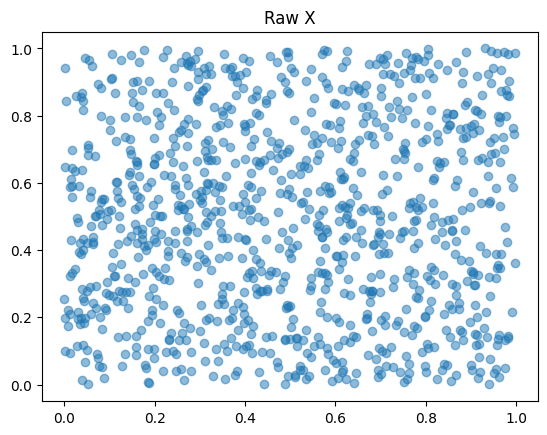

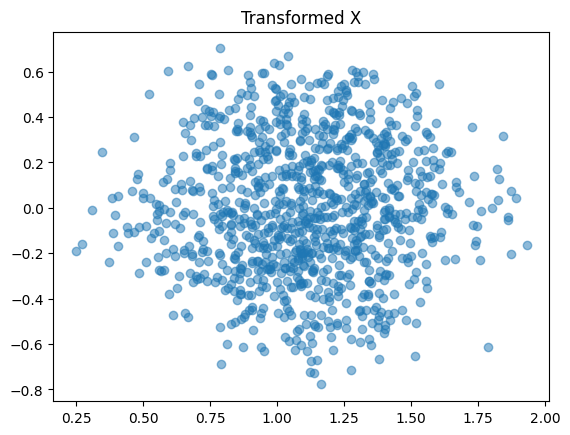

In [2]:
from sklearn.decomposition import TruncatedSVD

np.random.seed(0)

x=np.random.rand(1000,5)
svd=TruncatedSVD(n_components=2).fit(x)

x_reduced=svd.transform(x)

print('shape x: ',x.shape)
print('shape x: ',x_reduced.shape)
print('V^T components:\n',svd.components_)
print('singular values: ',svd.singular_values_)

plt.scatter(x[:,0],x[:,1],alpha=.5)
plt.title('Raw X')

plt.figure()
plt.scatter(x_reduced[:,0],x_reduced[:,1],alpha=.5)
plt.title('Transformed X')

In [3]:
svd.components_

array([[ 0.44172604,  0.44236507,  0.43750996,  0.45677079,  0.45731469],
       [ 0.15436396, -0.45022909,  0.05455117,  0.72699188, -0.49190701]])

In [4]:
svd.singular_values_

array([36.33007549,  9.40118894])

In [5]:
pd.DataFrame(x).describe()

,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.492493,0.492313,0.487033,0.504841,0.508175
std,0.283662,0.286006,0.285541,0.298304,0.291955
min,0.000074,0.000072,0.001383,0.000367,0.000903
25%,0.252822,0.247487,0.256961,0.247867,0.260311
50%,0.491264,0.490484,0.462259,0.493873,0.518117
75%,0.735254,0.731830,0.728011,0.774452,0.769834
max,0.997994,0.999949,0.998199,0.999931,0.999964


In [6]:
pd.DataFrame(x_reduced).describe()

,0,1
count,1000.000000,1000.000000
mean,1.111403,-0.002021
std,0.291105,0.297434
min,0.249077,-0.778036
25%,0.912439,-0.214844
50%,1.113656,-0.017527
75%,1.317018,0.218328
max,1.931530,0.701839


In [7]:
x.shape

(1000, 5)

components:
 [[ 0.97804106  0.2084123 ]
 [-0.2084123   0.97804106]]
explained variance:  [13.32552549  0.49501994]
mean:  [20.49972534 20.10061544]


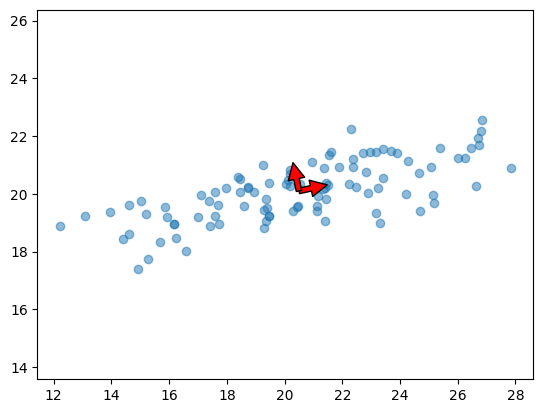

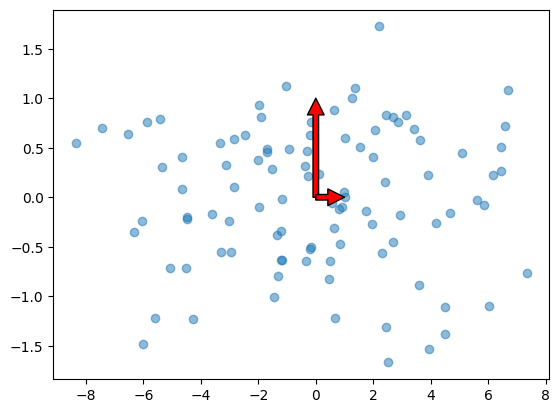

In [73]:
from matplotlib.colors import LogNorm
from sklearn.decomposition import PCA

def plot_vector(v0,v1,ax):
    ax.annotate('',v1,v0,arrowprops={'facecolor':'red','shrink':0})

np.random.seed(0)

c=np.array([[0., -0.7], [3.5, .7]])
x=np.dot(np.random.randn(100,2),c)+np.array([20, 20])
#x=np.random.rand(1000,2)-.5

fig,ax=plt.subplots()

ax.scatter(x[:,0],x[:,1],alpha=.5)
ax.axis('equal')

pca=PCA(n_components=2,svd_solver='auto').fit(x)

print('components:\n',pca.components_)
print('explained variance: ',pca.explained_variance_)
print('mean: ',pca.mean_)

for vector in pca.components_:
    plot_vector(pca.mean_,pca.mean_+(vector*1),ax)

###########################################################
x_transformed=pca.transform(x)

fig,ax=plt.subplots()
ax.scatter(x_transformed[:,0],x_transformed[:,1],alpha=.5)
ax.axis('tight')

mean=np.array([0,0])
plot_vector(mean,mean+[0,1],ax)
plot_vector(mean,mean+[1,0],ax)

In [9]:
np.std(x)

2.521917409025499

In [10]:
np.median(x_transformed)

-0.043590162007510536

In [11]:
np.mean(x_transformed)

2.042810365310288e-16

In [12]:
np.std(x_transformed)

2.4195025452564902

In [13]:
pca.svd_solver

'auto'

X shape (100, 2)
X transformed shape (100, 1)


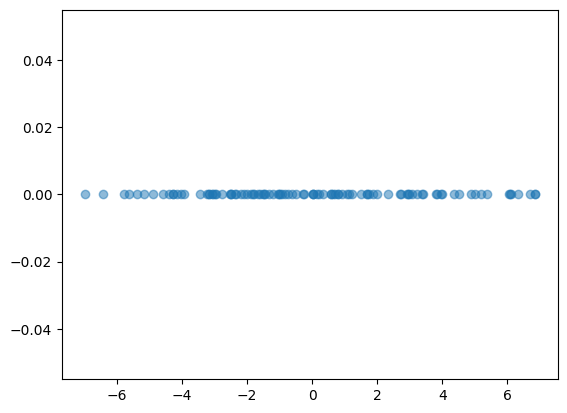

In [14]:
pca=PCA(n_components=1).fit(x)
x_trans2=pca.transform(x)

plt.scatter(x_trans2,np.zeros_like(x_trans2),alpha=.5)

print('X shape',x.shape)
print('X transformed shape',x_trans2.shape)

X inverse transform (100, 2)


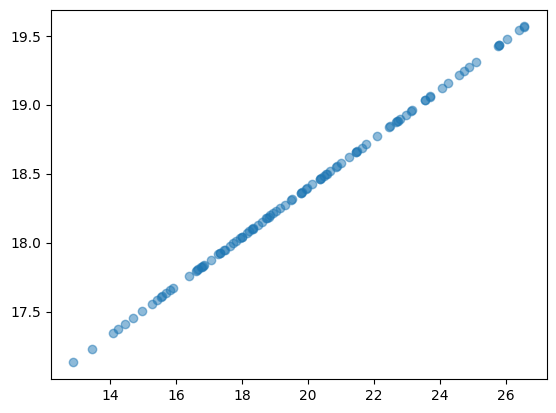

In [15]:
x_inverse_transform=pca.inverse_transform(x_trans2)

print('X inverse transform',x_inverse_transform.shape)
plt.scatter(x_inverse_transform[:,0],x_inverse_transform[:,1],alpha=.5)

In [16]:
np.abs(-16)

16

In [17]:
np.sqrt(16)

4.0

mean_absolute_error:  0.002220931306729429
mean_squared_error:  1.3112023110591507e-05
root_mean_squared_error:  0.0027555550257183257


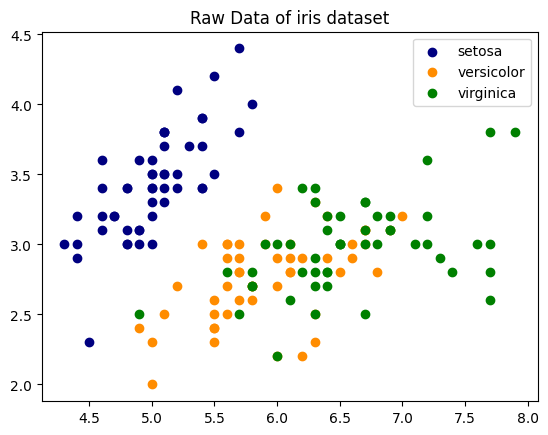

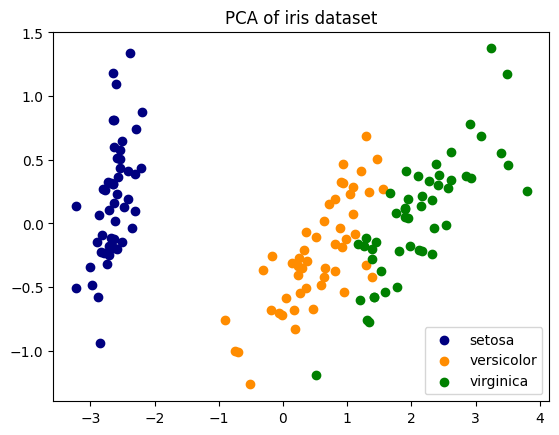

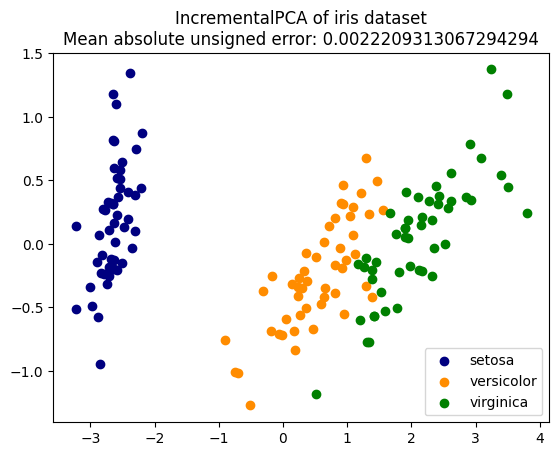

In [19]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA,IncrementalPCA
from itertools import cycle

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error


iris=load_iris()
x,y=iris.data,iris.target

pca=PCA(n_components=2)
x_pca=pca.fit_transform(x)

ipca=IncrementalPCA(n_components=2,batch_size=10)
x_ipca=ipca.fit_transform(x)

color=('navy','darkorange','g')

for x_vector,title in [[x,'Raw Data'],[x_pca,'PCA'],[x_ipca,'IncrementalPCA']]:
    plt.figure()
    for i,col in zip(set(iris.target),color):
        plt.scatter(x_vector[y==i,0],x_vector[y==i,1],c=col,)
    if 'Incremental' in title:
        MAE=np.abs(x_pca-x_ipca).mean()
        plt.title(title+' of iris dataset\nMean absolute unsigned error: {}'.format(MAE))
    else:
        plt.title(title+' of iris dataset')
    plt.legend(iris.target_names,loc='best',shadow=False,scatterpoints=1)
    plt.axis('tight')
print('mean_absolute_error: ',mean_absolute_error(x_pca,x_ipca))
print('mean_squared_error: ',mean_squared_error(x_pca,x_ipca))
print('root_mean_squared_error: ',root_mean_squared_error(x_pca,x_ipca))


In [20]:
y.shape

(150,)

In [21]:
set(iris.target)

{0, 1, 2}

In [22]:
x.shape

(150, 4)

In [23]:
x_pca.shape

(150, 2)

In [24]:
x_ipca.shape

(150, 2)

In [25]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
(x_pca-x_ipca).mean()

-2.41140440948584e-15

In [27]:
np.abs(x_pca-x_ipca).mean()

0.0022209313067294294

In [28]:
np.abs(np.abs(x_pca)-np.abs(x_ipca)).mean()

0.0022012210262588624

In [29]:
pd_iris=pd.DataFrame(np.c_[iris.data,iris.target],columns=iris.feature_names+['target'])
pd_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

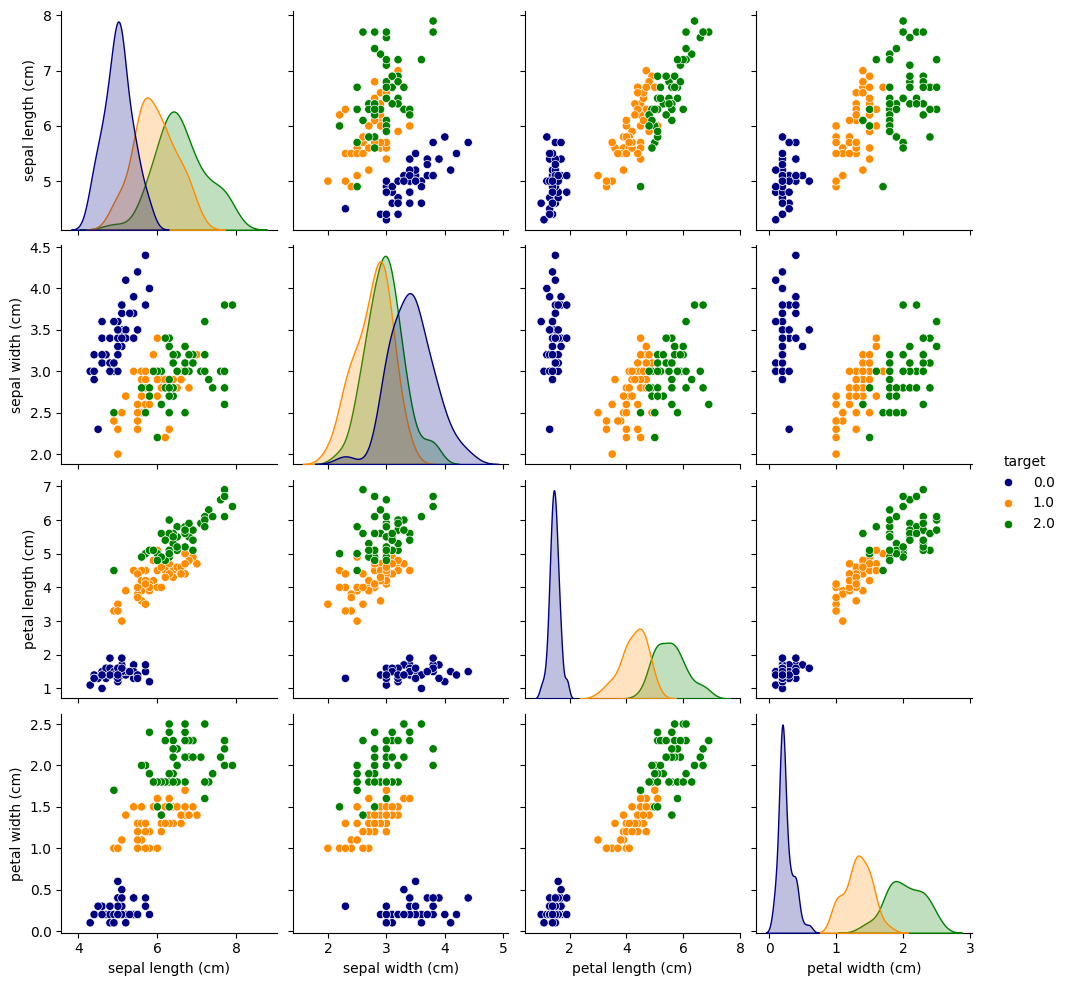

In [30]:

sb.pairplot(pd_iris,hue='target',palette={0:'navy',1:'darkorange',2:'green'})

X PCA shape:  (400, 2)
X KernelPCA shape:  (400, 289)


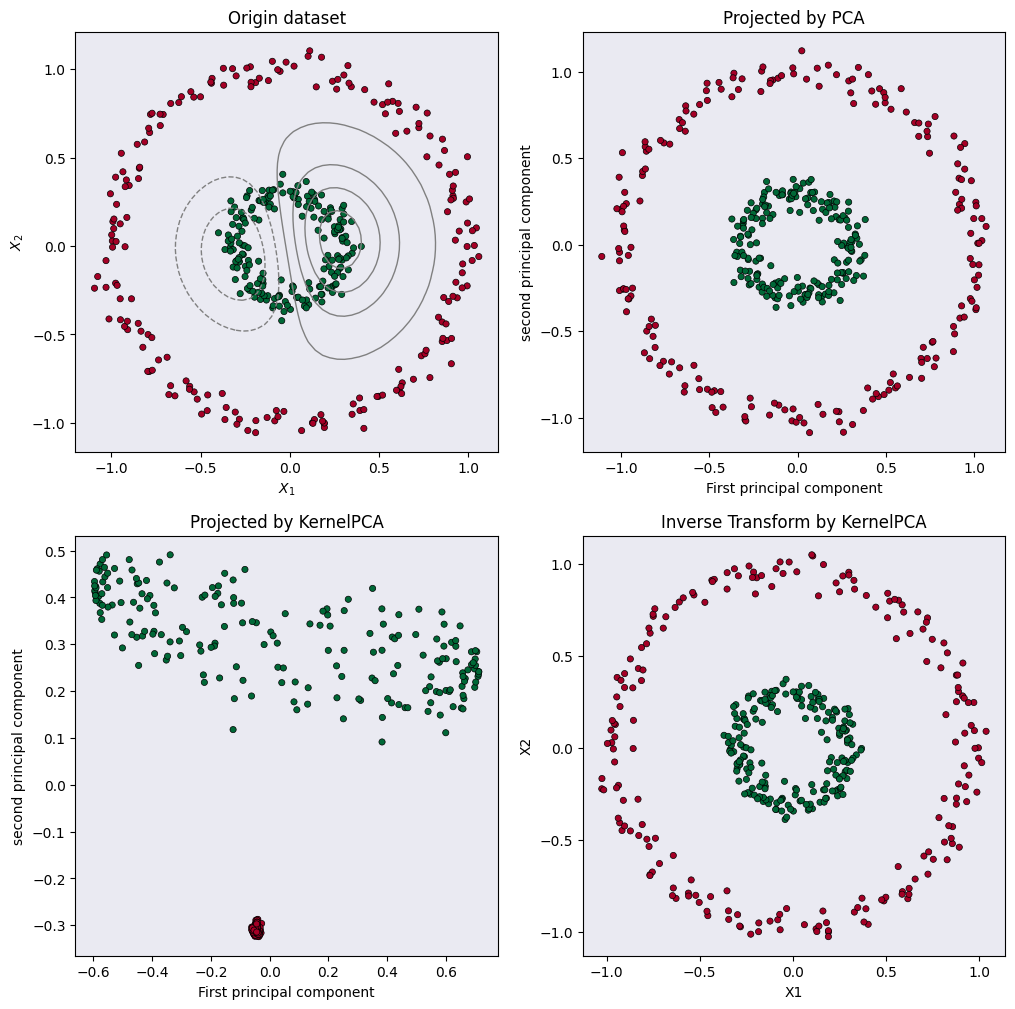

In [31]:
#KernelPCA

from sklearn.decomposition import PCA,KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

x,y=make_circles(n_samples=400,factor=.3,noise=.05)

plt.figure(figsize=(12,12))
    
plt.subplot(2,2,1,).set_facecolor('#eaeaf2')
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlGn,s=20,edgecolors='k',lw=.5)
plt.title('Origin dataset')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')

pca=PCA()
x_pca=pca.fit_transform(x)
plt.subplot(2,2,2,).set_facecolor('#eaeaf2')
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap=plt.cm.RdYlGn,s=20,edgecolors='k',lw=.5)
plt.title('Projected by PCA')
plt.xlabel('First principal component')
plt.ylabel('second principal component')
print('X PCA shape: ',x_pca.shape)

kpca=KernelPCA(kernel='rbf',gamma=10,alpha=.1,fit_inverse_transform=True)################333333
x_kpca=kpca.fit_transform(x)
plt.subplot(2,2,3,).set_facecolor('#eaeaf2')
plt.scatter(x_kpca[:,0],x_kpca[:,1],c=y,cmap=plt.cm.RdYlGn,s=20,edgecolors='k',lw=.5)
plt.title('Projected by KernelPCA')
plt.xlabel('First principal component')
plt.ylabel('second principal component')
print('X KernelPCA shape: ',x_kpca.shape)

x_inverse_transform=kpca.inverse_transform(x_kpca)#####
plt.subplot(2,2,4,).set_facecolor('#eaeaf2')
plt.scatter(x_inverse_transform[:,0],x_inverse_transform[:,1],c=y,cmap=plt.cm.RdYlGn,s=20,edgecolors='k',lw=.5)
plt.title('Inverse Transform by KernelPCA')
plt.xlabel('X1')
plt.ylabel('X2')

x_grid,y_grid=np.meshgrid(np.linspace(-1,1,50),np.linspace(-1,1,50))
z=np.c_[x_grid.ravel(),y_grid.ravel()]
z_grid=kpca.transform(z)[:,0].reshape(x_grid.shape)
plt.subplot(2,2,1).contour(x_grid,y_grid,z_grid,colors='grey',linewidths=1,origin='lower')

In [32]:
x.shape

(400, 2)

In [33]:
x_grid.shape

(50, 50)

In [34]:
z.shape

(2500, 2)

In [35]:
z_grid.shape

(50, 50)

In [36]:
50*50

2500

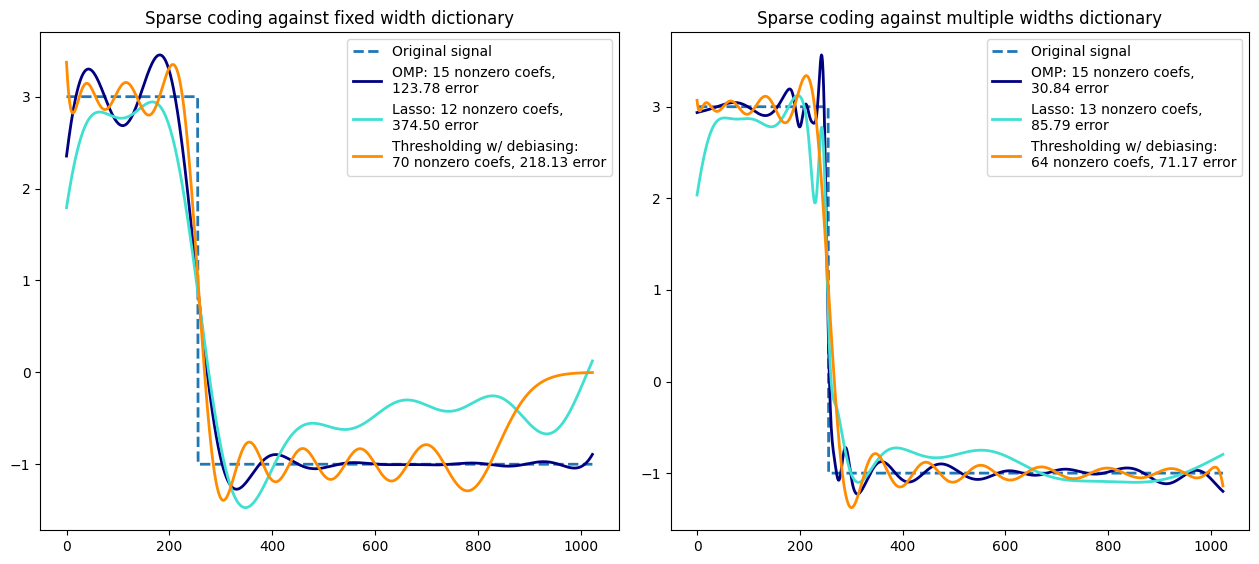

In [68]:
#Dictionary Learning
#Sparse dictionary learning or Sparse coding

from sklearn.decomposition import SparseCoder

np.random.seed(0)

def ricker_function(resolution, center, width):
    """Discrete sub-sampled Ricker (Mexican hat) wavelet"""
    x = np.linspace(0, resolution - 1, resolution)
    x = ((2 / (np.sqrt(3 * width) * np.pi ** .25))
         * (1 - (x - center) ** 2 / width ** 2)
         * np.exp(-(x - center) ** 2 / (2 * width ** 2)))
    return x


def ricker_matrix(width, resolution, n_components):
    """Dictionary of Ricker (Mexican hat) wavelets"""
    centers = np.linspace(0, resolution - 1, n_components)
    D = np.empty((n_components, resolution))
    for i, center in enumerate(centers):
        D[i] = ricker_function(resolution, center, width)
    D /= np.sqrt(np.sum(D ** 2, axis=1))[:, np.newaxis]
    return D

resolution=1024
subsampling=3 #subsampling factor
width=100
n_components=resolution//subsampling

#compute a wavelet dictionary
D_fixed = ricker_matrix(width=width, resolution=resolution,n_components=n_components)
D_multi = np.r_[tuple(ricker_matrix(width=w, resolution=resolution, n_components=n_components // 5)
                for w in (10, 50, 100, 500, 1000))]

#generate a signal
y=np.linspace(0,resolution-1,resolution)
first_quarter=y<resolution//4
y[first_quarter]=3.
y[np.logical_not(first_quarter)]=-1.

# List the different sparse coding methods in the following format:
# (title, transform_algorithm, transform_alpha,transform_n_nozero_coefs, color)
estimators = [('OMP', 'omp', None, 15, 'navy'),
              ('Lasso', 'lasso_lars', 2, None, 'turquoise'), ]

lw=2

plt.figure(figsize=(13, 6))
for subplot, (D, title) in enumerate(zip((D_fixed, D_multi),
                                         ('fixed width', 'multiple widths'))):
    plt.subplot(1, 2, subplot + 1)
    plt.title('Sparse coding against %s dictionary' % title)
    plt.plot(y, lw=lw, linestyle='--', label='Original signal')
    # Do a wavelet approximation
    for title, algo, alpha, n_nonzero, color in estimators:
        coder = SparseCoder(dictionary=D, transform_n_nonzero_coefs=n_nonzero,
                            transform_alpha=alpha, transform_algorithm=algo)
        x = coder.transform(y.reshape(1, -1))
        density = len(np.flatnonzero(x))
        x = np.ravel(np.dot(x, D))
        squared_error = np.sum((y - x) ** 2)
        plt.plot(x, color=color, lw=lw,
                 label='%s: %s nonzero coefs,\n%.2f error'
                 % (title, density, squared_error))

    # Soft thresholding debiasing
    coder = SparseCoder(dictionary=D, transform_algorithm='threshold',
                        transform_alpha=20)
    x = coder.transform(y.reshape(1, -1))
    _, idx = np.where(x != 0)
    x[0, idx], _, _, _ = np.linalg.lstsq(D[idx, :].T, y,rcond=None)
    x = np.ravel(np.dot(x, D))
    squared_error = np.sum((y - x) ** 2)
    plt.plot(x, color='darkorange', lw=lw,
             label='Thresholding w/ debiasing:\n%d nonzero coefs, %.2f error'
             % (len(idx), squared_error))
    plt.axis('tight')
    plt.legend(shadow=False, loc='best')
plt.subplots_adjust(.04, .07, .97, .90, .09, .2)

In [59]:
D_fixed.shape

(341, 1024)

In [60]:
D_multi.shape

(340, 1024)

In [61]:
y.shape

(1024,)

In [41]:
y

array([ 3.,  3.,  3., ..., -1., -1., -1.])

In [62]:
resolution//4


256

In [65]:
y.reshape(1,-1).shape

(1, 1024)

Dataset consists of 400 faces
Extracting the top 6 MiniBatchDictionaryLearning...
done in 4.105s
Extracting the top 6 Dictionary learning...
done in 4.784s
Extracting the top 6 Dictionary learning - positive dictionary...
done in 2.668s
Extracting the top 6 Dictionary learning - positive code...
done in 1.433s
Extracting the top 6 Dictionary learning - positive dictionary & code...
done in 0.865s


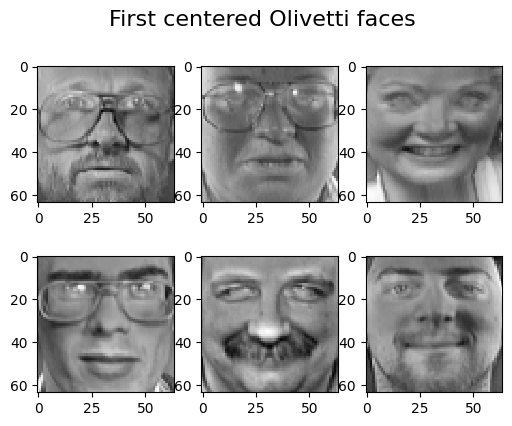

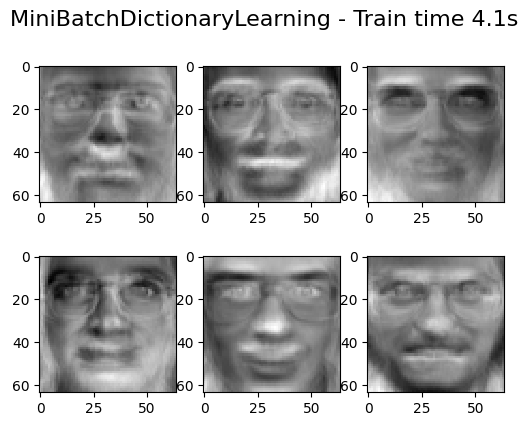

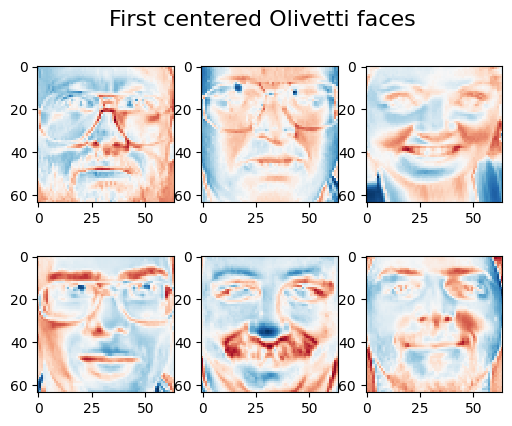

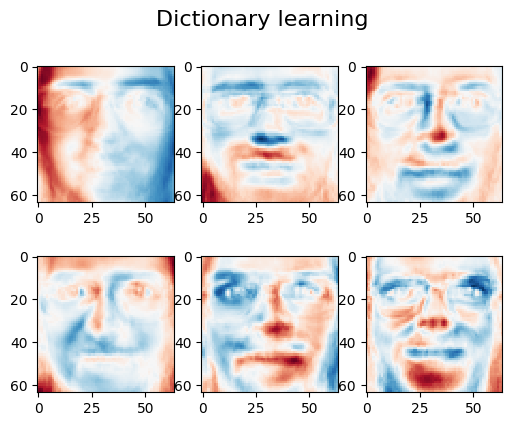

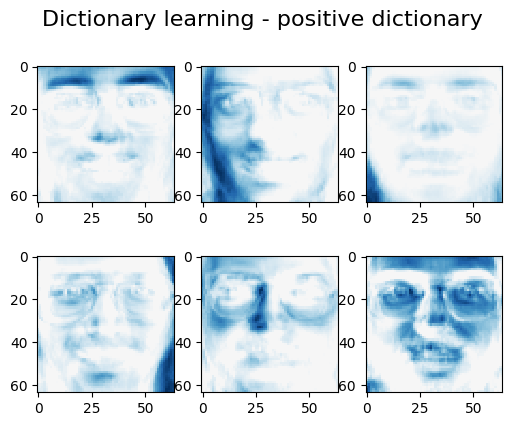

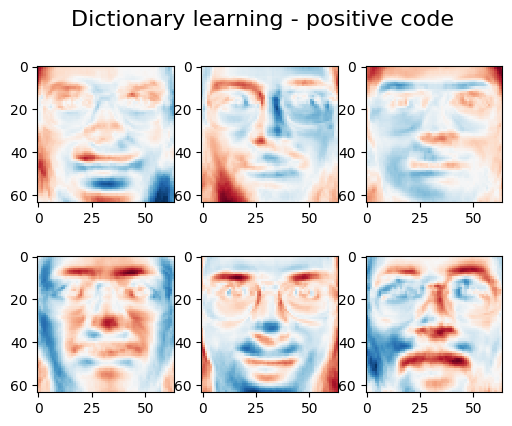

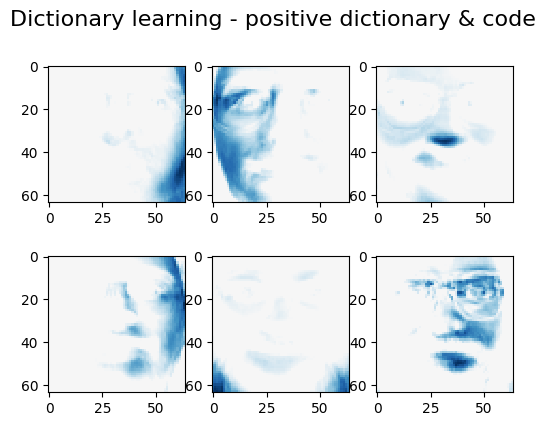

In [59]:
#generic dictionary learning

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import MiniBatchDictionaryLearning

from time import time
import logging


#disolay progress logs on stdout
logging.basicConfig(level=logging.INFO,format='%(asctime)s %(levelname)s %(message)s')#

n_row,n_col=2,3
n_components=n_row*n_col
image_shape=(64,64)
rng=np.random.RandomState(0)

#load faces data
faces,_=fetch_olivetti_faces(return_X_y=True,shuffle=True,random_state=rng)

n_samples,n_features=faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)#

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)#

print("Dataset consists of %d faces" % n_samples)

def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
               
# List of the different estimators, whether to center and transpose theproblem,
#and whether the transformer uses the clustering API.
estimator = [
    ('MiniBatchDictionaryLearning',
    MiniBatchDictionaryLearning(n_components=15, alpha=0.1, max_iter=50, batch_size=3,random_state=rng),
    True)]
################################################################################
# Plot a sample of the input data
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

'''
plt.figure(figsize=(2. * 4, 2.26 * 10))   
for i, comp in enumerate(faces):
    plt.subplot(10, 4, i +1)
    vmax = max(comp.max(), -comp.min())
    plt.imshow(comp.reshape(image_shape),
    interpolation='nearest',cmap=plt.cm.gray,
    vmin=-vmax, vmax=vmax)
'''
################################################################################
# Do the estimation and plot it
for name, estimator, center in estimator:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_

    # Plot an image representing the pixelwise variance provided by the
    # estimator e.g its noise_variance_ attribute. The Eigenfaces estimator,
    # via the PCA decomposition, also provides a scalar noise_variance_
    # (the mean of pixelwise variance) that cannot be displayed as an image
    # so we skip it.
    if (hasattr(estimator, 'noise_variance_') and
            estimator.noise_variance_.ndim > 0):  # Skip the Eigenfaces case
        plot_gallery("Pixelwise variance",
                     estimator.noise_variance_.reshape(1, -1), n_col=1,
                     n_row=1)
    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                 components_[:n_components])


# Various positivity constraints applied to dictionary learning.
estimators = [
    ('Dictionary learning',
    MiniBatchDictionaryLearning(n_components=15, alpha=0.1,max_iter=50, batch_size=3,random_state=rng),
     True),
    
    ('Dictionary learning - positive dictionary',
    MiniBatchDictionaryLearning(n_components=15, alpha=0.1,max_iter=50, batch_size=3,random_state=rng,
                                positive_dict=True),
     True),
    
    ('Dictionary learning - positive code',
    MiniBatchDictionaryLearning(n_components=15, alpha=0.1,max_iter=50, batch_size=3,random_state=rng,
                                fit_algorithm='cd',positive_code=True),
     True),
    
    ('Dictionary learning - positive dictionary & code',
    MiniBatchDictionaryLearning(n_components=15, alpha=0.1,max_iter=50, batch_size=3,random_state=rng,
                                fit_algorithm='cd', positive_dict=True,positive_code=True),
     True),
]
#################################################################################
# Plot a sample of the input data
plot_gallery("First centered Olivetti faces", faces_centered[:n_components],cmap=plt.cm.RdBu)

################################################################################
# Do the estimation and plot it

for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    components_ = estimator.components_
    plot_gallery(name, components_[:n_components], cmap=plt.cm.RdBu)


In [8]:
faces.shape

(400, 4096)

In [12]:
_.shape

(400,)

In [15]:
set(_)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39}

In [17]:
n_samples

400

In [18]:
n_features

4096

In [23]:
faces.mean(axis=0).shape

(4096,)

In [27]:
faces_centered.mean(axis=1).shape

(400,)

In [29]:
faces_centered.mean(axis=1).reshape(n_samples, -1).shape


(400, 1)

In [34]:
estimator

[('MiniBatchDictionaryLearning',
  MiniBatchDictionaryLearning(alpha=0.1, batch_size=3, max_iter=50,
                              n_components=15,
                              random_state=RandomState(MT19937) at 0x780A3419C940),
  True)]

In [61]:
estimator.components_.shape

(15, 4096)

In [62]:
estimator.n_features_in_

4096

In [63]:
estimator.n_iter_

1.0

In [64]:
estimator.n_steps_

124

Components:
 [[-3.27884498 -0.72266752]
 [-0.          0.        ]]
Noise Variance:  [0.97700588 0.48871717]
Mean:  [20.23416889 20.04390541]


[]

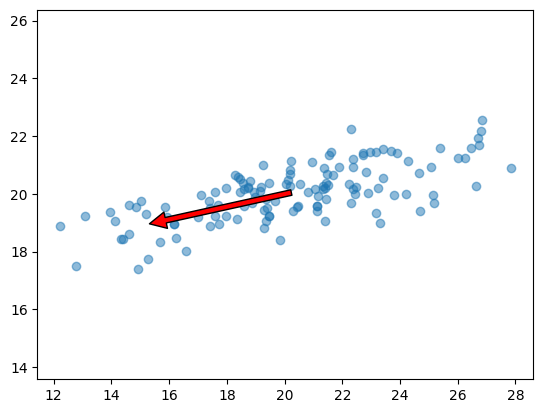

In [100]:
#FactorAnalysis
from sklearn.decomposition import FactorAnalysis

np.random.seed(0)

def draw_vector(v0,v1,ax):
    ax.annotate('',v1,v0,arrowprops={'facecolor':'red','shrink':0})

c=np.array([[0., -0.7], [3.5, .7]])
x_train=np.dot(np.random.randn(128,2),c)+[20,20]

fig,ax=plt.subplots()
ax.scatter(x_train[:,0],x_train[:,1],alpha=.5)
ax.axis('equal')

fa=FactorAnalysis(n_components=2).fit(x_train)

print('Components:\n',fa.components_)
print('Noise Variance: ',fa.noise_variance_)
print('Mean: ',fa.mean_)

for vector in fa.components_:
    v = vector * 1.5
    draw_vector(fa.mean_, fa.mean_ + v, ax)

#ax.plot()

In [95]:
fa.components_

array([[-3.27884498, -0.72266752],
       [-0.        ,  0.        ]])

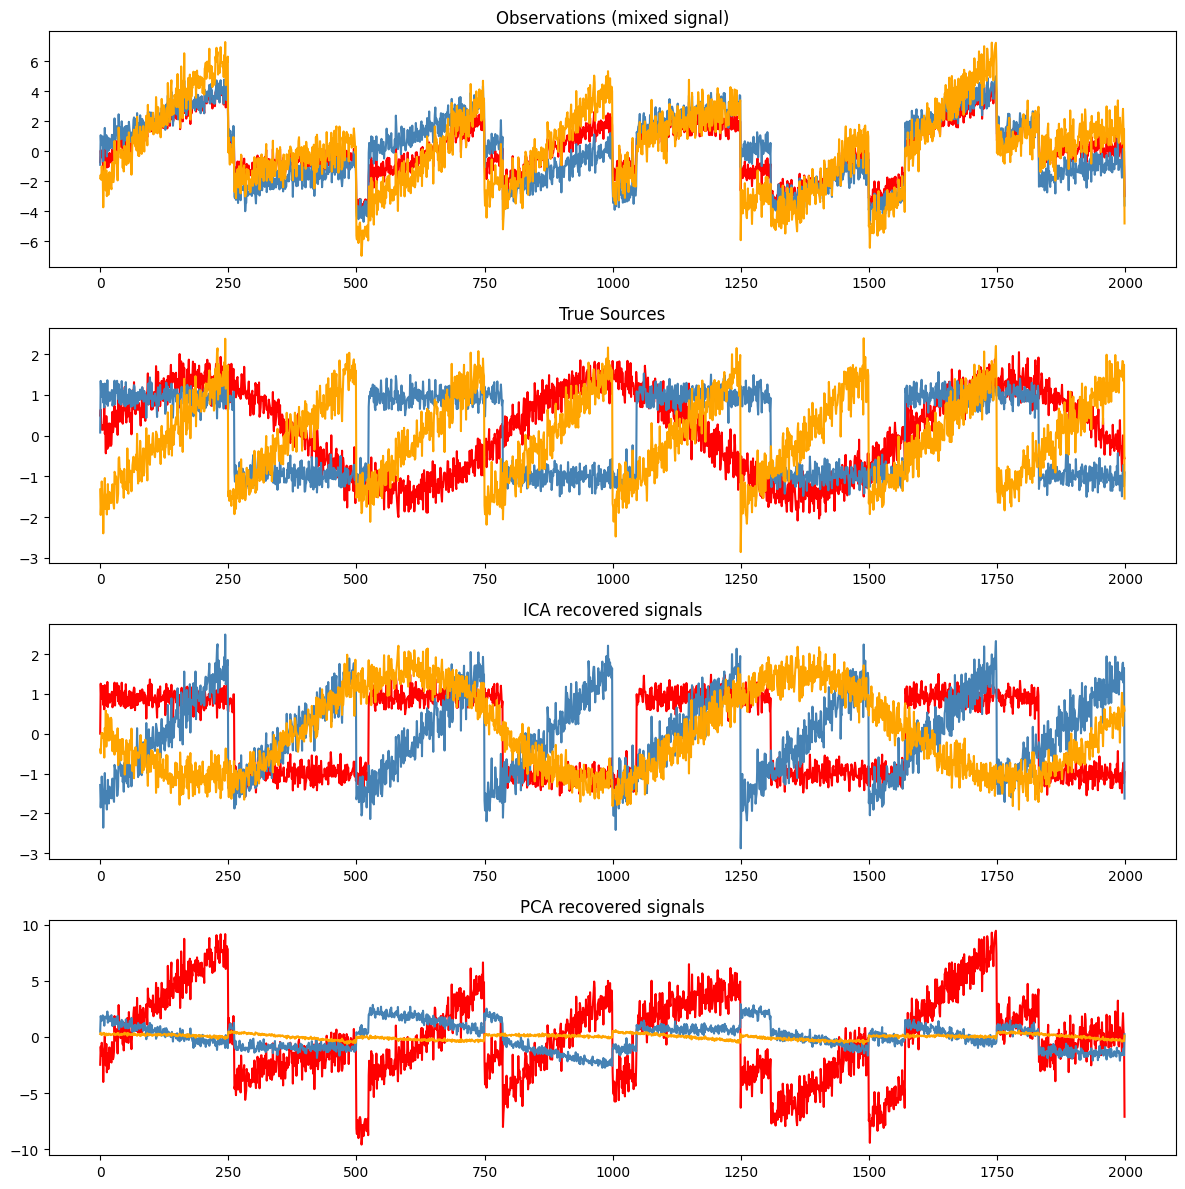

In [173]:
#Independent Component Analysis (ICA)
from sklearn.decomposition import PCA,FastICA
from scipy import signal

np.random.seed(0)

#generate sample data
time=np.linspace(0,8,2000)

s1=np.sin(2*time) # Signal 1 : sinusoidal signal
s2=np.sign(np.sin(3*time)) # Signal 2 : square signal
s3=signal.sawtooth(2*np.pi*time) # Signal 3: saw tooth signal

s=np.c_[s1,s2,s3]
s+=.2*np.random.normal(size=s.shape) #adding noise
s/=s.std(axis=0)# Standardize data

a= np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
x=np.dot(s,a.T) # Generate observations

ica=FastICA(n_components=3)
s_=ica.fit_transform(x) #recond=struct signals
a_=ica.mixing_

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(x, np.dot(s_, a_.T) +ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
h = pca.fit_transform(x)  # Reconstruct signals based on orthogonal components

# Plot results
plt.figure(figsize=(12,12))

models = [x, s, s_, h]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for i,(model,name) in enumerate(zip(models,names),start=1):
    plt.subplot(4,1,i)
    plt.title(name)
    for sig,col in zip(model.T,colors):
        plt.plot(sig,color=col)
        
plt.tight_layout()

In [111]:
s.shape

(2000, 3)

In [116]:
a.transpose().shape

(3, 3)

In [123]:
a

array([[1. , 1. , 1. ],
       [0.5, 2. , 1. ],
       [1.5, 1. , 2. ]])

In [124]:
a.T

array([[1. , 0.5, 1.5],
       [1. , 2. , 1. ],
       [1. , 1. , 2. ]])

In [128]:
x.shape

(2000, 3)

In [138]:
s_.shape

(2000, 3)

In [139]:
a_

array([[ 1.01396018,  1.02993002, -0.94915864],
       [ 1.9826966 ,  0.98533885, -0.47232592],
       [ 0.99746591,  2.05242661, -1.37841317]])

In [140]:
ica.whitening_

array([[ 0.00277975,  0.00334264,  0.00416173],
       [ 0.00099574, -0.01521871,  0.01155838],
       [ 0.08645156, -0.02372605, -0.03868739]])

In [141]:
ica.whiten_solver

'svd'

In [142]:
ica.whiten

'unit-variance'

In [150]:
x = "hi"

#if condition returns False, AssertionError is raised:
assert x == "hello","x should be 'hello'"


AssertionError: x should be 'hello'

In [151]:
ica.mean_

array([0.202367  , 0.16130366, 0.27732952])

In [167]:
x.T.shape

(3, 2000)

W : Shape (128, 2)
H : [[ 9.91477966 13.36803282]
 [19.91279227 15.78154963]]
Reconstruction Error : 2.2869009328205703


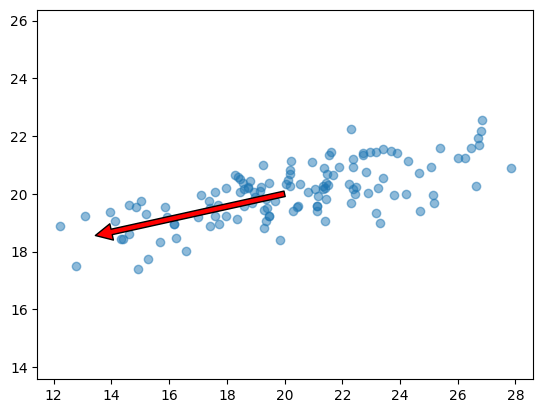

In [191]:
# Non-nagative Matrix Factorization (NMF or NNMF)
from sklearn.decomposition import NMF

np.random.seed(0)

c=np.array([[0., -0.7], [3.5, .7]])
x_train=np.dot(np.random.randn(128,2),c)+[20,20]

fig,ax=plt.subplots()
ax.scatter(x_train[:,0],x_train[:,1],alpha=.5)
ax.axis('equal')

clf=NMF(n_components=2)
W=clf.fit_transform(x_train)
H=clf.components_

print('W : Shape {}'.format(W.shape))
print('H : {}'.format(H))
print('Reconstruction Error : {}'.format(clf.reconstruction_err_))

for vector in fa.components_:
    v = vector * 2
    draw_vector(np.array([20, 20]), np.array([20, 20]) + v, ax)


In [182]:
W.shape

(128, 2)

In [183]:
H.shape

(2, 2)

In [184]:
H

array([[ 9.91477966, 13.36803282],
       [19.91279227, 15.78154963]])

In [189]:
clf.reconstruction_err_

2.2869009328205703

(0.0, 4.0, 0.0, 4.0)

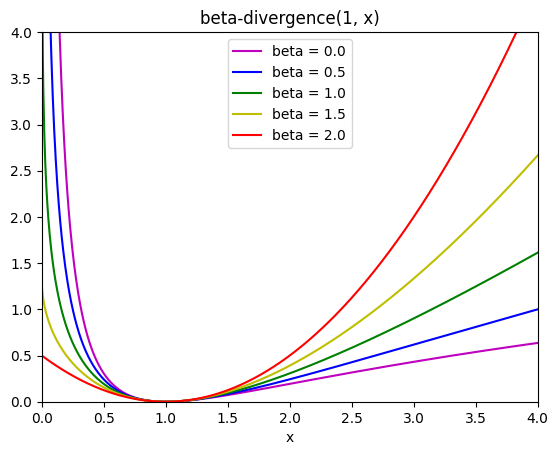

In [207]:
#NMF with a beta-divergence

from sklearn.decomposition._nmf import _beta_divergence

x=np.linspace(.001,4,1000)
y=np.zeros(x.shape)

colors='mbgyr'
for j, beta in enumerate((0., 0.5, 1., 1.5, 2.)):
    for i, xi in enumerate(x):
        y[i] = _beta_divergence(1, xi, 1, beta)
    name = "beta = %1.1f" % beta
    plt.plot(x, y, label=name, color=colors[j])

plt.xlabel("x")
plt.title("beta-divergence(1, x)")
plt.legend(loc=0)
plt.axis([0, 4, 0, 4])


In [208]:
y.shape

(1000,)

In [276]:
# Latent Dirichlet Allocation (LDA)
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF,LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from time import time

np.random.seed(0)

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
    
# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
data, _ = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'),return_X_y=True)   
data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))
  
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,max_features=n_features,stop_words='english')   
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))   
    
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,max_features=n_features,stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()   

# Fit the NMF model (Frobenius norm)
print("Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,alpha_W=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print_top_words(nmf, tfidf_feature_names, n_top_words)

# Fit the NMF model (generalized Kullback-Leibler norm)
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,alpha_W=.1,l1_ratio=.5,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, ).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print_top_words(nmf, tfidf_feature_names, n_top_words)

# Fit the LDA model
print("Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,learning_method='online',
                                learning_offset=50.,random_state=0).fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)

Loading dataset...
done in 1.417s.
Extracting tf-idf features for NMF...
done in 0.322s.
Extracting tf features for LDA...
done in 0.386s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.073s.

Topics in NMF model (Frobenius norm):
Topic #0: young encrypted exactly evidence events especially error eric equipment entire engine enforcement energy end encryption email drive effort effective effect
Topic #1: young encrypted exactly evidence events especially error eric equipment entire engine enforcement energy end encryption email drive effort effective effect
Topic #2: young encrypted exactly evidence events especially error eric equipment entire engine enforcement energy end encryption email drive effort effective effect
Topic #3: young encrypted exactly evidence events especially error eric equipment entire engine enforcement energy end encryption email drive effort effective effect
Topic #4: young encrypted exactly evidence

In [234]:
(len(data))

11314

In [238]:
(len(data[0]))

852

In [240]:
len(data_samples)

2000

In [241]:
len(data_samples[0])

852

In [245]:
tfidf.shape

(2000, 1000)

In [249]:
tfidf_vectorizer.idf_.shape

(1000,)

In [253]:
len(tfidf_vectorizer.vocabulary_)

1000

In [256]:
tf.shape

(2000, 1000)

In [262]:
nmf.components_.shape

(10, 1000)

In [263]:
nmf.n_components_

10

In [264]:
nmf.n_features_in_

1000

In [265]:
nmf.n_iter_

2

In [266]:
nmf.reconstruction_err_

43.87482193696061

In [270]:
tfidf_vectorizer.get_feature_names_out().shape

(1000,)

In [278]:
lda.components_.shape

(10, 1000)